In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso,Ridge
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("flight_price_train.csv")
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648


EDA PROCESS

In [3]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [4]:
df = df.dropna(axis = 0, how ='any')

In [5]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [6]:
df["Additional_Info"].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [7]:
df["Additional_Info"]=df["Additional_Info"].replace("No Info","No info")

In [8]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [9]:
df["Price"]=df["Price"].astype(float)

In [10]:
df["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

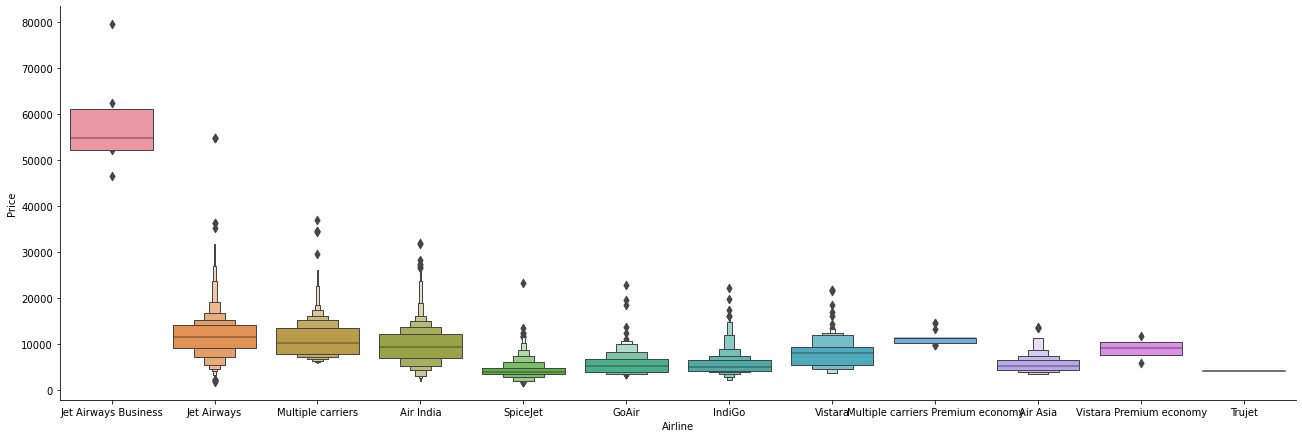

In [11]:
sns.catplot(y = "Price", x = "Airline", data = df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)

ENCODING CATEGORICAL OBJECTIVE COLUMNS

In [14]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [15]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list=['Airline','Source', 'Destination', 'Route', 'Total_Stops','Additional_Info']
for val in list:
    df[val]=le.fit_transform(df[val])
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,3,24/03/2019,0,5,18,22:20,01:10 22 Mar,2h 50m,4,7,3897.0
1,1,1/05/2019,3,0,84,05:50,13:15,7h 25m,1,7,7662.0
2,4,9/06/2019,2,1,118,09:25,04:25 10 Jun,19h,1,7,13882.0
3,3,12/05/2019,3,0,91,18:05,23:30,5h 25m,0,7,6218.0
4,3,01/03/2019,0,5,29,16:50,21:35,4h 45m,0,7,13302.0
...,...,...,...,...,...,...,...,...,...,...,...
10678,0,9/04/2019,3,0,64,19:55,22:25,2h 30m,4,7,4107.0
10679,1,27/04/2019,3,0,64,20:45,23:20,2h 35m,4,7,4145.0
10680,4,27/04/2019,0,2,18,08:20,11:20,3h,4,7,7229.0
10681,10,01/03/2019,0,5,18,11:30,14:10,2h 40m,4,7,12648.0


In [16]:
df["Date_of_Journey"]=pd.to_datetime(df["Date_of_Journey"])
df["Dep_Time"]=pd.to_datetime(df["Dep_Time"])
df["Arrival_Time"]=pd.to_datetime(df["Arrival_Time"])

In [17]:
df['journey_month']=df['Date_of_Journey'].dt.month
df["journey_day"]=df["Date_of_Journey"].dt.day
df.drop("Date_of_Journey",axis=1,inplace=True)

In [18]:
df['dep_hour']=df['Dep_Time'].dt.hour
df["dep_minute"]=df["Dep_Time"].dt.minute
df.drop("Dep_Time",axis=1,inplace=True)

In [19]:
df['arrival_hour']=df['Arrival_Time'].dt.hour
df["arrival_minute"]=df["Arrival_Time"].dt.minute
df.drop("Arrival_Time",axis=1,inplace=True)

In [20]:
df

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_month,journey_day,dep_hour,dep_minute,arrival_hour,arrival_minute
0,3,0,5,18,2h 50m,4,7,3897.0,3,24,22,20,1,10
1,1,3,0,84,7h 25m,1,7,7662.0,1,5,5,50,13,15
2,4,2,1,118,19h,1,7,13882.0,9,6,9,25,4,25
3,3,3,0,91,5h 25m,0,7,6218.0,12,5,18,5,23,30
4,3,0,5,29,4h 45m,0,7,13302.0,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,64,2h 30m,4,7,4107.0,9,4,19,55,22,25
10679,1,3,0,64,2h 35m,4,7,4145.0,4,27,20,45,23,20
10680,4,0,2,18,3h,4,7,7229.0,4,27,8,20,11,20
10681,10,0,5,18,2h 40m,4,7,12648.0,1,3,11,30,14,10


In [21]:
def get_duration(x):
    x=x.split(' ')
    hours=0
    mins=0
    if len(x)==1:
        x=x[0]
        if x[-1]=='h':
            hours=int(x[:-1])
        else:
            mins=int(x[:-1])
    else:
        hours=int(x[0][:-1])
        mins=int(x[1][:-1])
    return hours,mins
df['Duration_hours']=df.Duration.apply(lambda x:get_duration(x)[0])
df['Duration_mins']=df.Duration.apply(lambda x:get_duration(x)[1])
df.drop(["Duration"], axis = 1, inplace = True)

In [22]:
df

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_month,journey_day,dep_hour,dep_minute,arrival_hour,arrival_minute,Duration_hours,Duration_mins
0,3,0,5,18,4,7,3897.0,3,24,22,20,1,10,2,50
1,1,3,0,84,1,7,7662.0,1,5,5,50,13,15,7,25
2,4,2,1,118,1,7,13882.0,9,6,9,25,4,25,19,0
3,3,3,0,91,0,7,6218.0,12,5,18,5,23,30,5,25
4,3,0,5,29,0,7,13302.0,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,64,4,7,4107.0,9,4,19,55,22,25,2,30
10679,1,3,0,64,4,7,4145.0,4,27,20,45,23,20,2,35
10680,4,0,2,18,4,7,7229.0,4,27,8,20,11,20,3,0
10681,10,0,5,18,4,7,12648.0,1,3,11,30,14,10,2,40


array([[<AxesSubplot:title={'center':'Airline'}>,
        <AxesSubplot:title={'center':'Source'}>,
        <AxesSubplot:title={'center':'Destination'}>,
        <AxesSubplot:title={'center':'Route'}>,
        <AxesSubplot:title={'center':'Total_Stops'}>,
        <AxesSubplot:title={'center':'Additional_Info'}>,
        <AxesSubplot:title={'center':'Price'}>,
        <AxesSubplot:title={'center':'journey_month'}>],
       [<AxesSubplot:title={'center':'journey_day'}>,
        <AxesSubplot:title={'center':'dep_hour'}>,
        <AxesSubplot:title={'center':'dep_minute'}>,
        <AxesSubplot:title={'center':'arrival_hour'}>,
        <AxesSubplot:title={'center':'arrival_minute'}>,
        <AxesSubplot:title={'center':'Duration_hours'}>,
        <AxesSubplot:title={'center':'Duration_mins'}>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:

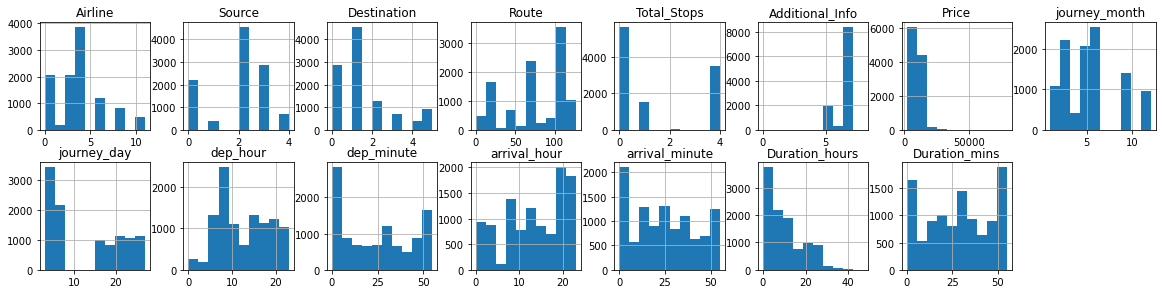

In [25]:
df.hist(figsize=(20,20),grid=True,layout=(8,8))

In [25]:
df.describe()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_month,journey_day,dep_hour,dep_minute,arrival_hour,arrival_minute,Duration_hours,Duration_mins
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000
mean,3.966205,1.952256,1.436154,74.820165,1.458248,6.582101,9087.214567,5.534731,12.682925,12.491013,24.409287,13.349186,24.690601,10.244898,28.326624
std,2.352090,1.177276,1.474845,36.729039,1.806320,0.838102,4611.548810,2.987626,8.803800,5.748820,18.767801,6.859317,16.506808,8.494916,16.945817
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1759.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,0.000000,48.000000,0.000000,7.000000,5277.000000,3.000000,5.000000,8.000000,5.000000,8.000000,10.000000,2.000000,15.000000
50%,4.000000,2.000000,1.000000,73.000000,0.000000,7.000000,8372.000000,5.000000,6.000000,11.000000,25.000000,14.000000,25.000000,8.000000,30.000000
75%,4.000000,3.000000,2.000000,104.000000,4.000000,7.000000,12373.000000,6.000000,21.000000,18.000000,40.000000,19.000000,35.000000,15.000000,45.000000
max,11.000000,4.000000,5.000000,127.000000,4.000000,8.000000,79512.000000,12.000000,27.000000,23.000000,55.000000,23.000000,55.000000,47.000000,55.000000


In [26]:
df.skew()

Airline            0.731057
Source            -0.424023
Destination        1.244046
Route             -0.501911
Total_Stops        0.631532
Additional_Info   -2.114397
Price              1.812405
journey_month      0.629556
journey_day        0.367212
dep_hour           0.112924
dep_minute         0.167234
arrival_hour      -0.370146
arrival_minute     0.110945
Duration_hours     0.851197
Duration_mins     -0.090680
dtype: float64

Airline              AxesSubplot(0.125,0.799681;0.0824468x0.0803191)
Source             AxesSubplot(0.223936,0.799681;0.0824468x0.0803...
Destination        AxesSubplot(0.322872,0.799681;0.0824468x0.0803...
Route              AxesSubplot(0.421809,0.799681;0.0824468x0.0803...
Total_Stops        AxesSubplot(0.520745,0.799681;0.0824468x0.0803...
Additional_Info    AxesSubplot(0.619681,0.799681;0.0824468x0.0803...
Price              AxesSubplot(0.718617,0.799681;0.0824468x0.0803...
journey_month      AxesSubplot(0.817553,0.799681;0.0824468x0.0803...
journey_day          AxesSubplot(0.125,0.703298;0.0824468x0.0803191)
dep_hour           AxesSubplot(0.223936,0.703298;0.0824468x0.0803...
dep_minute         AxesSubplot(0.322872,0.703298;0.0824468x0.0803...
arrival_hour       AxesSubplot(0.421809,0.703298;0.0824468x0.0803...
arrival_minute     AxesSubplot(0.520745,0.703298;0.0824468x0.0803...
Duration_hours     AxesSubplot(0.619681,0.703298;0.0824468x0.0803...
Duration_mins      AxesSubplot(0.7

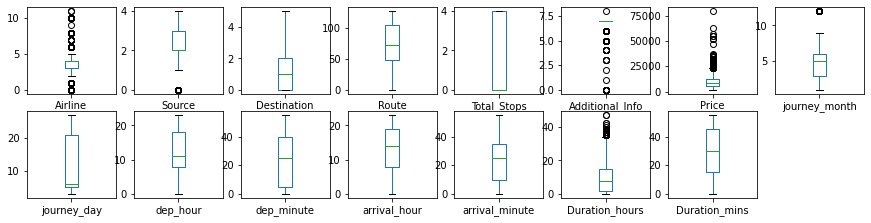

In [27]:
df.plot(kind="box",subplots=True,layout=(8,8),figsize=(15,15))

Z SCORE METHOD

In [28]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.41080484, 1.65835945, 2.41653414, ..., 0.8900139 , 0.97061397,
        1.27904078],
       [1.26115217, 0.89001433, 0.97381203, ..., 0.5870944 , 0.38199906,
        0.19631866],
       [0.01436882, 0.04055641, 0.2957428 , ..., 0.0187446 , 1.03067671,
        1.67167809],
       ...,
       [0.01436882, 1.65835945, 0.38232644, ..., 0.2841749 , 0.85289099,
        1.67167809],
       [2.56541078, 1.65835945, 2.41653414, ..., 0.8900139 , 0.97061397,
        0.688897  ],
       [1.26115217, 0.04055641, 0.2957428 , ..., 0.5870944 , 0.26427608,
        0.49139054]])

In [29]:
df_new=df[(z<3).all(axis=1)]
df_new

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_month,journey_day,dep_hour,dep_minute,arrival_hour,arrival_minute,Duration_hours,Duration_mins
0,3,0,5,18,4,7,3897.0,3,24,22,20,1,10,2,50
1,1,3,0,84,1,7,7662.0,1,5,5,50,13,15,7,25
2,4,2,1,118,1,7,13882.0,9,6,9,25,4,25,19,0
3,3,3,0,91,0,7,6218.0,12,5,18,5,23,30,5,25
4,3,0,5,29,0,7,13302.0,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,64,4,7,4107.0,9,4,19,55,22,25,2,30
10679,1,3,0,64,4,7,4145.0,4,27,20,45,23,20,2,35
10680,4,0,2,18,4,7,7229.0,4,27,8,20,11,20,3,0
10681,10,0,5,18,4,7,12648.0,1,3,11,30,14,10,2,40


In [30]:
df.shape

(10682, 15)

In [31]:
10506/10682

0.9835236847032391

In [32]:
df_new.skew()

Airline            0.729121
Source            -0.439390
Destination        1.265878
Route             -0.506968
Total_Stops        0.613538
Additional_Info   -1.473188
Price              0.413729
journey_month      0.635327
journey_day        0.353125
dep_hour           0.103347
dep_minute         0.171729
arrival_hour      -0.361859
arrival_minute     0.107407
Duration_hours     0.765940
Duration_mins     -0.098030
dtype: float64

BY USING LOG TRANSFORM METHOD 

In [35]:
skew=["Airline","Destination","Total_Stops","Additional_Info","journey_month","Duration_hours"]
for col in skew:
    if df_new.skew().loc[col]>0.55:
        df_new[col]=np.log1p(df_new[col])

In [36]:
df_new.skew()

Airline           -0.690825
Source            -0.439390
Destination        0.283649
Route             -0.506968
Total_Stops        0.456322
Additional_Info   -1.473188
Price              0.413729
journey_month     -0.532959
journey_day        0.353125
dep_hour           0.103347
dep_minute         0.171729
arrival_hour      -0.361859
arrival_minute     0.107407
Duration_hours    -0.100813
Duration_mins     -0.098030
dtype: float64

CORRELATION GRAPH

In [37]:
df_new.corr()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_month,journey_day,dep_hour,dep_minute,arrival_hour,arrival_minute,Duration_hours,Duration_mins
Airline,1.000000,-0.010444,0.035911,0.049275,-0.063316,-0.183330,0.036726,0.001239,0.029116,-0.045795,-0.081530,-0.012705,-0.110920,-0.075960,-0.057257
Source,-0.010444,1.000000,-0.620871,0.390473,-0.230720,-0.045810,0.079388,0.034907,-0.005848,0.059138,-0.049531,0.026468,0.021266,0.157052,-0.149230
Destination,0.035911,-0.620871,1.000000,-0.329961,0.357361,0.064076,-0.191285,-0.066704,0.003348,-0.105764,0.098413,-0.054361,-0.017209,-0.362206,0.055233
Route,0.049275,0.390473,-0.329961,1.000000,-0.424998,0.018169,0.256252,0.048832,0.083556,-0.073000,-0.058920,0.013133,-0.177391,0.397591,-0.235640
Total_Stops,-0.063316,-0.230720,0.357361,-0.424998,1.000000,0.151666,-0.575441,-0.056436,0.039374,0.034251,0.059946,-0.105398,0.180885,-0.753103,0.182748
Additional_Info,-0.183330,-0.045810,0.064076,0.018169,0.151666,1.000000,-0.020831,-0.024920,-0.034606,-0.053696,-0.014220,0.035320,0.047985,-0.171996,0.047813
Price,0.036726,0.079388,-0.191285,0.256252,-0.575441,-0.020831,1.000000,0.067590,-0.140073,0.013545,-0.054501,0.033749,-0.102347,0.675859,-0.135601
journey_month,0.001239,0.034907,-0.066704,0.048832,-0.056436,-0.024920,0.067590,1.000000,-0.119408,0.018477,0.003207,-0.004733,-0.032739,0.072760,-0.025487
journey_day,0.029116,-0.005848,0.003348,0.083556,0.039374,-0.034606,-0.140073,-0.119408,1.000000,-0.004405,-0.013073,-0.001983,-0.020726,-0.036273,-0.009396
dep_hour,-0.045795,0.059138,-0.105764,-0.073000,0.034251,-0.053696,0.013545,0.018477,-0.004405,1.000000,-0.026571,0.014133,0.068704,0.002156,-0.031828


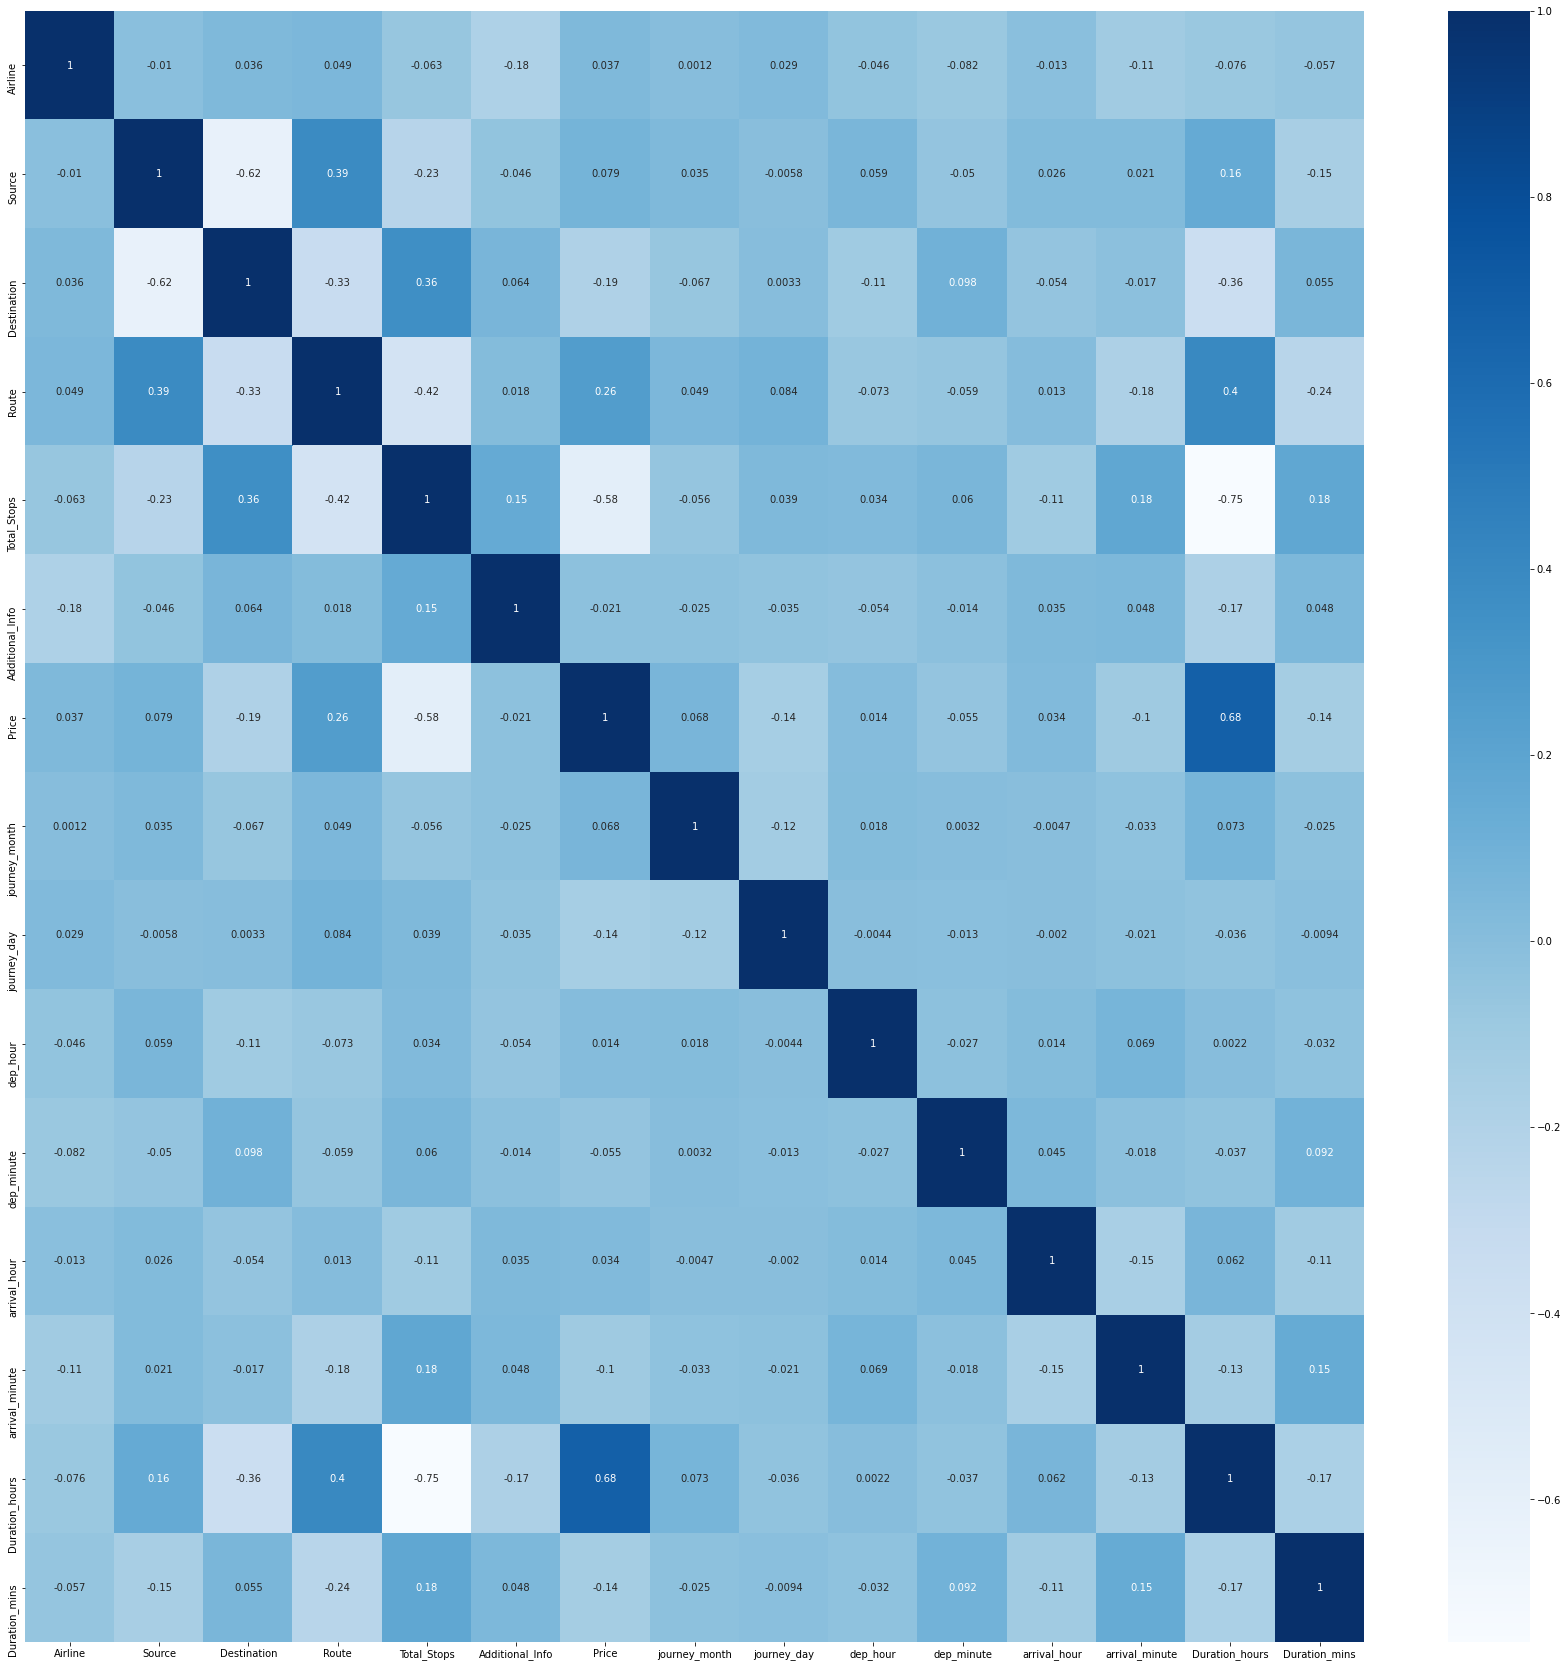

In [38]:
plt.figure(figsize=(30,30))
sns.heatmap(df_new.corr(),annot=True,cmap="Blues")
plt.show()

CHECKING FOR VIF FACTOR

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
x=df_new.iloc[:,df_new.columns != 'Price']
x

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,journey_month,journey_day,dep_hour,dep_minute,arrival_hour,arrival_minute,Duration_hours,Duration_mins
0,1.386294,0,1.791759,18,1.609438,7,1.386294,24,22,20,1,10,1.098612,50
1,0.693147,3,0.000000,84,0.693147,7,0.693147,5,5,50,13,15,2.079442,25
2,1.609438,2,0.693147,118,0.693147,7,2.302585,6,9,25,4,25,2.995732,0
3,1.386294,3,0.000000,91,0.000000,7,2.564949,5,18,5,23,30,1.791759,25
4,1.386294,0,1.791759,29,0.000000,7,0.693147,3,16,50,21,35,1.609438,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0.000000,3,0.000000,64,1.609438,7,2.302585,4,19,55,22,25,1.098612,30
10679,0.693147,3,0.000000,64,1.609438,7,1.609438,27,20,45,23,20,1.098612,35
10680,1.609438,0,1.098612,18,1.609438,7,1.609438,27,8,20,11,20,1.386294,0
10681,2.397895,0,1.791759,18,1.609438,7,0.693147,3,11,30,14,10,1.098612,40


In [40]:
def calc_vif(x):
    vif=pd.DataFrame()
    vif["variable"]=x.columns
    vif["VIF factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

In [41]:
calc_vif(x)

,variable,VIF factor
0,Airline,8.005243
1,Source,6.428259
2,Destination,4.582809
3,Route,8.060736
4,Total_Stops,4.077283
5,Additional_Info,40.465746
6,journey_month,13.200941
7,journey_day,3.143394
8,dep_hour,5.729848
9,dep_minute,2.751777


STANDARD SCALER METHOD

In [42]:
from sklearn.preprocessing import StandardScaler          
scale=StandardScaler()                                    
x=scale.fit_transform(x)
x

array([[-0.18022385, -1.67907905,  1.9296773 , ..., -0.88758526,
        -1.17653841,  1.27187862],
       [-1.49126094,  0.88183136, -1.29447289, ..., -0.58517993,
        -0.00463037, -0.20211666],
       [ 0.24183582,  0.02819455, -0.04720134, ...,  0.01963073,
         1.09016617, -1.67611194],
       ...,
       [ 0.24183582, -1.67907905,  0.68240575, ..., -0.2827746 ,
        -0.83281199, -1.67611194],
       [ 1.73314513, -1.67907905,  1.9296773 , ..., -0.88758526,
        -1.17653841,  0.68228051],
       [-1.49126094,  0.02819455, -0.04720134, ..., -0.58517993,
         0.13609839, -0.49691571]])

In [44]:
y=df_new.iloc[:,6]
y

0         3897.0
1         7662.0
2        13882.0
3         6218.0
4        13302.0
          ...   
10678     4107.0
10679     4145.0
10680     7229.0
10681    12648.0
10682    11753.0
Name: Price, Length: 10506, dtype: float64

MACHINE LEARNING PROCESS

CHOOSING THE BEST RANDOM STATE

In [45]:
max_acc=0
max_rs=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i) 
    m=DecisionTreeRegressor()
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    acc=r2_score(predm,y_test)   
       
    if acc>max_acc:
        max_acc=acc
        max_rs=i
print("best accuracy=",max_acc,"on random state",max_rs)

best accuracy= 0.9003457706350491 on random state 26


In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=26)

In [47]:
model=[LinearRegression(),DecisionTreeRegressor(),SVR(),RandomForestRegressor(),KNeighborsRegressor()]
for i in model:
    i.fit(x_train,y_train)
    pred_test=i.predict(x_test)
    print("testing score=",r2_score(pred_test,y_test))         
    print("training score=",i.score(x_train,y_train))
    mse=mean_squared_error(pred_test,y_test)
    rmse=math.sqrt(mse)
    print("error=",rmse,"\n")

testing score= 0.057173155500484185
training score= 0.49836449970710806
error= 2826.394688077977 

testing score= 0.896988002458271
training score= 0.9948287920501422
error= 1304.5589549978195 

testing score= -281.16461279348914
training score= 0.04587913639345076
error= 3991.4360721866215 

testing score= 0.9297803766443729
training score= 0.9854313504589235
error= 1041.908909918134 

testing score= 0.7190909864768185
training score= 0.8471457318922015
error= 1978.3488108196625 



CROSS VALIDATION PROCESS

In [48]:
from sklearn.model_selection import cross_val_score
model=[LinearRegression(),DecisionTreeRegressor(),SVR(),RandomForestRegressor(),KNeighborsRegressor()]
for i in model:
    score=cross_val_score(i,x,y,cv=5) 
    print("score=",score)
    print("mean_score=",score.mean())
    print("std=",score.std(),"\n")

score= [0.50645439 0.52789085 0.50385376 0.47668539 0.50301067]
mean_score= 0.5035790123406003
std= 0.016266522038935645 

score= [0.89039049 0.8778058  0.87249881 0.8698261  0.88695682]
mean_score= 0.8794956039914359
std= 0.007995973159254422 

score= [0.05666654 0.03703272 0.05878338 0.06656718 0.05260713]
mean_score= 0.054331390338874616
std= 0.009769389904087935 

score= [0.93063304 0.92740281 0.92651877 0.92245227 0.92599438]
mean_score= 0.9266002563975431
std= 0.0026262893184494816 

score= [0.78227879 0.78339195 0.75782435 0.75109492 0.76413862]
mean_score= 0.7677457257187951
std= 0.0129977551192558 



HYPERPARAMETER TUNING PROCESS FOR THE BEST MODEL

In [49]:
from sklearn.model_selection import GridSearchCV

In [50]:
parameters={"criterion":["squared_error","absolute_error", "poisson"],"warm_start":[True,False],"bootstrap": [True,False], "max_features": ["auto","sqrt","log2"]}

In [51]:
gcv=GridSearchCV(RandomForestRegressor(),parameters,cv=5)

In [52]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['squared_error', 'absolute_error',
                                       'poisson'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'warm_start': [True, False]})

In [53]:
gcv.best_params_

{'bootstrap': True,
 'criterion': 'poisson',
 'max_features': 'sqrt',
 'warm_start': False}

In [54]:
final_model=RandomForestRegressor(bootstrap=True,criterion="poisson",max_features="sqrt",warm_start=False)
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
print(r2_score(pred,y_test))
print("score=",final_model.score(x_train,y_train))
mse=mean_squared_error(pred,y_test)
rmse=math.sqrt(mse)
print(rmse)

0.8253697180097692
score= 0.9757316128289263
1516.364922648234


SAVING THE BEST MODEL

In [55]:
import joblib

joblib.dump(final_model,"flight_price_prediction.obj")

['flight_price_prediction.obj']

WORKING ON TEST DATASET 

In [56]:
df_test=pd.read_csv("flight_price_test.csv")
df_test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL ? BOM ? COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? MAA ? BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR ? DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU ? DEL ? BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU ? BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,04:00,19:15,15h 15m,1 stop,No info


ENCODING CATEGORICAL OBJECTIVE COLUMNS IN TEST DATASET

In [58]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list=['Airline','Source', 'Destination', 'Route', 'Total_Stops','Additional_Info']
for val in list:
    df_test[val]=le.fit_transform(df_test[val])
df_test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,4,6/06/2019,2,1,76,17:30,04:25 07 Jun,10h 55m,0,5
1,3,12/05/2019,3,0,65,06:20,10:20,4h,0,5
2,4,21/05/2019,2,1,76,19:15,19:00 22 May,23h 45m,0,3
3,6,21/05/2019,2,1,76,08:00,21:00,13h,0,5
4,0,24/06/2019,0,2,16,23:55,02:45 25 Jun,2h 50m,4,5
...,...,...,...,...,...,...,...,...,...,...
2666,1,6/06/2019,3,0,51,20:30,20:25 07 Jun,23h 55m,0,5
2667,3,27/03/2019,3,0,43,14:20,16:55,2h 35m,4,5
2668,4,6/03/2019,2,1,76,21:50,04:25 07 Mar,6h 35m,0,5
2669,1,6/03/2019,2,1,76,04:00,19:15,15h 15m,0,5


In [59]:
df_test["Date_of_Journey"]=pd.to_datetime(df_test["Date_of_Journey"])
df_test["Dep_Time"]=pd.to_datetime(df_test["Dep_Time"])
df_test["Arrival_Time"]=pd.to_datetime(df_test["Arrival_Time"])
df_test['journey_month']=df_test['Date_of_Journey'].dt.month
df_test["journey_day"]=df_test["Date_of_Journey"].dt.day
df_test.drop("Date_of_Journey",axis=1,inplace=True)
df_test['dep_hour']=df_test['Dep_Time'].dt.hour
df_test["dep_minute"]=df_test["Dep_Time"].dt.minute
df_test.drop("Dep_Time",axis=1,inplace=True)
df_test['arrival_hour']=df_test['Arrival_Time'].dt.hour
df_test["arrival_minute"]=df_test["Arrival_Time"].dt.minute
df_test.drop("Arrival_Time",axis=1,inplace=True)

In [60]:
def get_duration(x):
    x=x.split(' ')
    hours=0
    mins=0
    if len(x)==1:
        x=x[0]
        if x[-1]=='h':
            hours=int(x[:-1])
        else:
            mins=int(x[:-1])
    else:
        hours=int(x[0][:-1])
        mins=int(x[1][:-1])
    return hours,mins
df_test['Duration_hours']=df_test.Duration.apply(lambda x:get_duration(x)[0])
df_test['Duration_mins']=df_test.Duration.apply(lambda x:get_duration(x)[1])
df_test.drop(["Duration"], axis = 1, inplace = True)

STANDARD SCALER METHOD

In [61]:
from sklearn.preprocessing import StandardScaler          
scale=StandardScaler()                                    
df_test=scale.fit_transform(df_test)
df_test

array([[ 0.01190758,  0.03256662, -0.29488167, ...,  0.02633999,
        -0.02253728,  1.58872298],
       [-0.42377921,  0.87708559, -0.97622158, ..., -0.27177067,
        -0.73775001, -1.69593467],
       [ 0.01190758,  0.03256662, -0.29488167, ..., -1.46421332,
         1.5270903 ,  0.9915125 ],
       ...,
       [ 0.01190758,  0.03256662, -0.29488167, ...,  0.02633999,
        -0.49934577,  0.39430202],
       [-1.29515278,  0.03256662, -0.29488167, ..., -0.56988133,
         0.57347333, -0.80011895],
       [ 0.88328115,  0.03256662, -0.29488167, ..., -0.56988133,
         0.45427121, -0.50151371]])

USING OUR MODEL ON TESTING FILE

In [62]:
flight_price_prediction_from_joblib=joblib.load("flight_price_prediction.obj")
flight_price_prediction_from_joblib.predict(df_test)

array([11671.55,  5650.06, 11724.31, ..., 13526.12,  8893.15,  8302.42])